In [1]:
import pandas as pd
import requests as req

from tqdm.notebook import tqdm


from bs4 import BeautifulSoup as bs

from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://ev-database.org/uk/cheatsheet/price-electric-car'

html = req.get(url).content 

soup = bs(html, 'html.parser')

In [3]:
tabla = soup.find('table')

In [4]:
rows = tabla.find_all('tr')
rows = [row.text.strip().split("\n") for row in rows]
rows

[['Average', '61354 Pounds'],
 ['BYD DOLPHIN 44.9 kWh Active ', '', '26000'],
 ['MG MG4 EV Standard Range ', '', '26995'],
 ['Fiat 500e Hatchback 24 kWh ', '', '28195'],
 ['BYD DOLPHIN 44.9 kWh Boost ', '', '28500'],
 ['Nissan Leaf ', '', '28995'],
 ['MG MG4 EV Long Range ', '', '29495'],
 ['Renault Zoe ZE50 R135 ', '', '29995'],
 ['MG ZS EV Standard Range ', '', '30495'],
 ['MG MG5 EV Long Range ', '', '30995'],
 ['BYD DOLPHIN 60.4 kWh ', '', '31000'],
 ['Fiat 600e ', '', '31000'],
 ['Fiat 500e Hatchback 42 kWh ', '', '31195'],
 ['Mazda MX-30 ', '', '31250'],
 ['Peugeot e-208 ', '', '31595'],
 ['Citroen e-C4 ', '', '31995'],
 ['Citroen e-C4 X ', '', '31995'],
 ['ORA Funky Cat First Edition ', '', '31995'],
 ['Peugeot e-208 50 kWh ', '', '32000'],
 ['Citroen e-Berlingo M 50 kWh ', '', '32315'],
 ['Vauxhall Corsa Electric 50 kWh ', '', '32445'],
 ['Mini Electric ', '', '32550'],
 ['Kia Soul EV 39.2 kWh ', '', '32845'],
 ['MG ZS EV Long Range ', '', '32995'],
 ['Peugeot e-Rifter Standard

In [5]:
colnames = rows[0]
data = rows[1:]

df = pd.DataFrame(rows)
df

,0,1,2
0,Average,61354 Pounds,None
1,BYD DOLPHIN 44.9 kWh Active,,26000
2,MG MG4 EV Standard Range,,26995
3,Fiat 500e Hatchback 24 kWh,,28195
4,BYD DOLPHIN 44.9 kWh Boost,,28500
...,...,...,...
209,Porsche Taycan Turbo S Cross Turismo,,149300
210,Mercedes EQS AMG 53 4MATIC+,,161860
211,BMW i7 M70 xDrive,,163315
212,Maserati GranTurismo Folgore,,200000


In [6]:
df['Model']= df[0]

In [7]:
df['Price']= df[2]

In [8]:
df.Price.fillna(61354,inplace= True)

In [9]:
data = pd.DataFrame({'Model': df['Model'], 'Price': df['Price']})

In [10]:
data

,Model,Price
0,Average,61354
1,BYD DOLPHIN 44.9 kWh Active,26000
2,MG MG4 EV Standard Range,26995
3,Fiat 500e Hatchback 24 kWh,28195
4,BYD DOLPHIN 44.9 kWh Boost,28500
...,...,...
209,Porsche Taycan Turbo S Cross Turismo,149300
210,Mercedes EQS AMG 53 4MATIC+,161860
211,BMW i7 M70 xDrive,163315
212,Maserati GranTurismo Folgore,200000


In [11]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   214 non-null    object
 1   Price   214 non-null    object
dtypes: object(2)
memory usage: 30.0 KB


In [12]:
data.Model.unique()

array(['Average', 'BYD DOLPHIN 44.9 kWh Active ',
       'MG MG4 EV Standard Range ', 'Fiat 500e Hatchback 24 kWh ',
       'BYD DOLPHIN 44.9 kWh Boost ', 'Nissan Leaf ',
       'MG MG4 EV Long Range ', 'Renault Zoe ZE50 R135 ',
       'MG ZS EV Standard Range ', 'MG MG5 EV Long Range ',
       'BYD DOLPHIN 60.4 kWh ', 'Fiat 600e ',
       'Fiat 500e Hatchback 42 kWh ', 'Mazda MX-30 ', 'Peugeot e-208 ',
       'Citroen e-C4 ', 'Citroen e-C4 X ', 'ORA Funky Cat First Edition ',
       'Peugeot e-208 50 kWh ', 'Citroen e-Berlingo M 50 kWh ',
       'Vauxhall Corsa Electric 50 kWh ', 'Mini Electric ',
       'Kia Soul EV 39.2 kWh ', 'MG ZS EV Long Range ',
       'Peugeot e-Rifter Standard 50 kWh ',
       'Citroen e-Berlingo XL 50 kWh ', 'Volvo EX30 Single Motor ',
       'Vauxhall Corsa-e ', 'Vauxhall Combo-e Life 50 kWh ',
       'Abarth 500e Hatchback ', 'Fiat 500e Cabrio ',
       'Vauxhall Combo-e Life XL 50 kWh ', 'Nissan Leaf e+ ',
       'Hyundai Kona Electric 48 kWh ', 'Peugeot 

In [13]:
data['Price'] = data['Price'].astype('int64')

In [14]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   214 non-null    object
 1   Price   214 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.7 KB


In [15]:
data.describe()

,Price
count,214.000000
mean,63355.009346
std,37279.325904
min,26000.000000
25%,37913.750000
50%,52342.500000
75%,77100.750000
max,350000.000000


In [16]:
split_data = data['Model'].str.split(expand=True)
data['Make'] = split_data[0]
data['Model'] = split_data[1]

In [17]:
data['model']= data['Model']

In [18]:
data['price']= data['Price']

In [19]:
data.drop(columns= 'Model',inplace=True)

In [20]:
data.drop(columns= 'Price',inplace=True)

In [21]:
data

,Make,model,price
0,Average,None,61354
1,BYD,DOLPHIN,26000
2,MG,MG4,26995
3,Fiat,500e,28195
4,BYD,DOLPHIN,28500
...,...,...,...
209,Porsche,Taycan,149300
210,Mercedes,EQS,161860
211,BMW,i7,163315
212,Maserati,GranTurismo,200000


In [22]:
no_dups= data.drop_duplicates()

In [23]:
no_dups.shape

(210, 3)

In [24]:
no_dups

,Make,model,price
0,Average,None,61354
1,BYD,DOLPHIN,26000
2,MG,MG4,26995
3,Fiat,500e,28195
4,BYD,DOLPHIN,28500
...,...,...,...
208,Porsche,Taycan,149300
210,Mercedes,EQS,161860
211,BMW,i7,163315
212,Maserati,GranTurismo,200000


In [25]:
no_dups.to_csv('data/Cars_Price_Clean.csv', index=False)

Text(0.5, 1.0, 'Count of Models per Make')

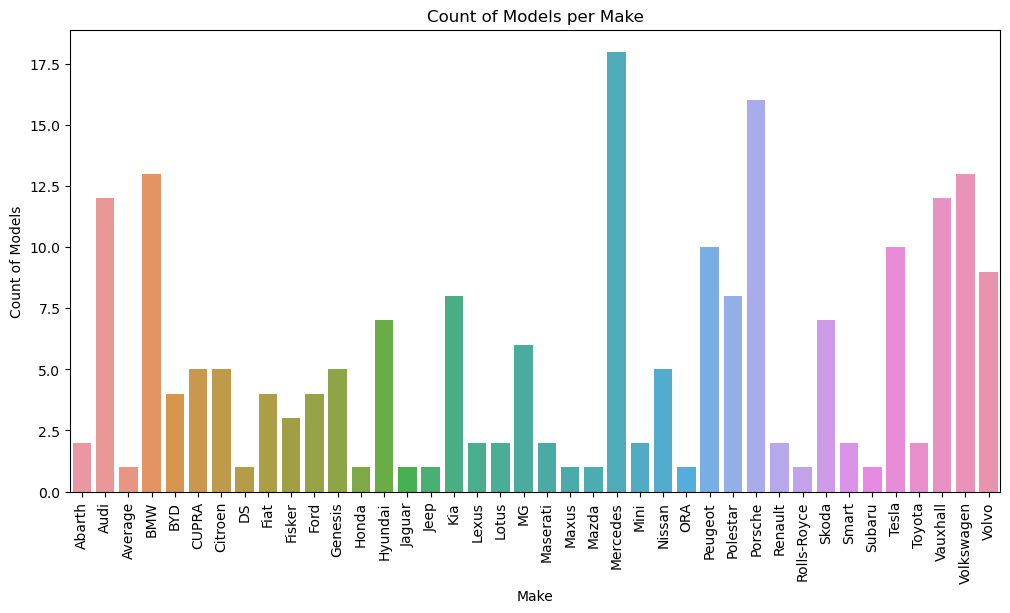

In [31]:
model_counts = no_dups.groupby('Make')['model'].nunique()
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', data=no_dups, order=model_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count of Models')
plt.title('Count of Models per Make')

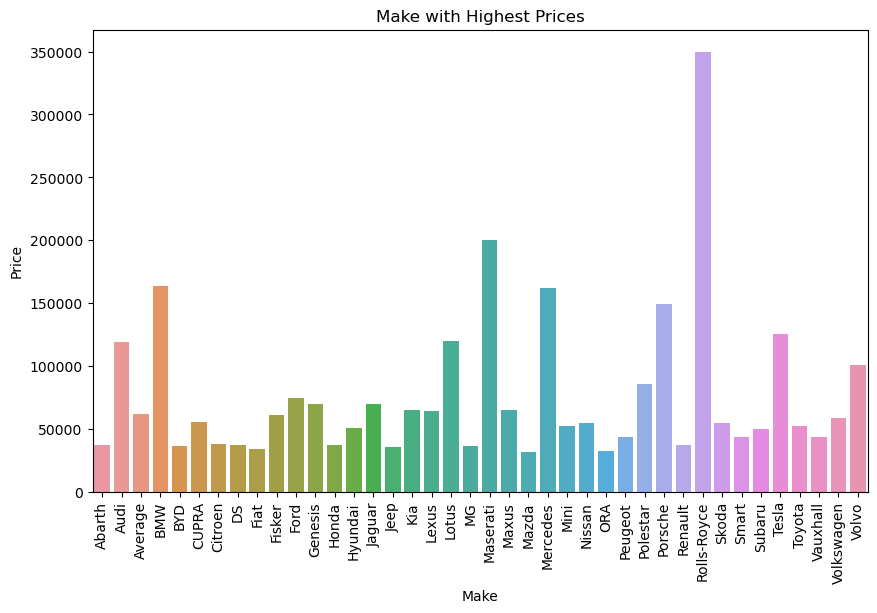

In [32]:
highest_prices = no_dups.groupby('Make')['price'].max().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Make', y='price', data=highest_prices)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Make with Highest Prices')
plt.xticks(rotation=90)
plt.show()

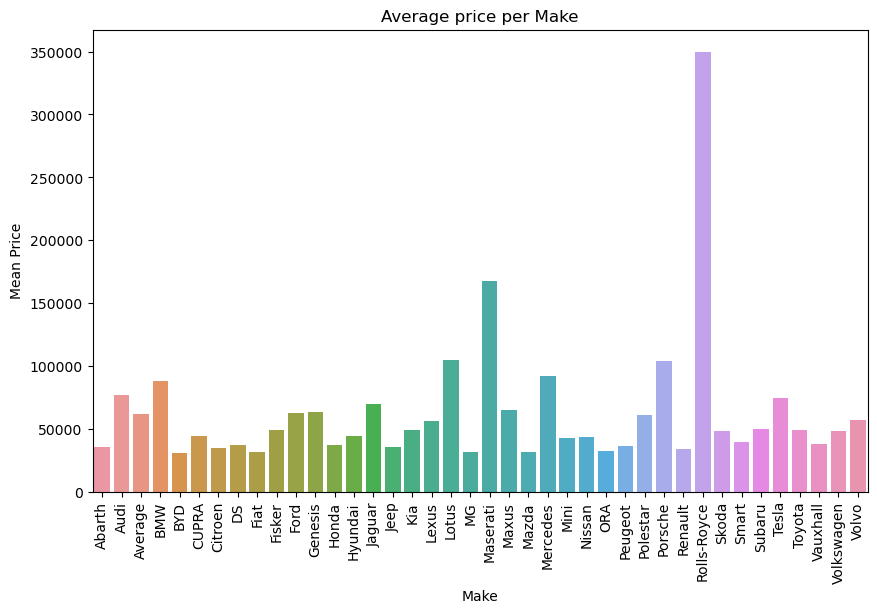

In [33]:
highest_prices = no_dups.groupby('Make')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Make', y='price', data=highest_prices)
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.title('Average price per Make')
plt.xticks(rotation=90)
plt.show()

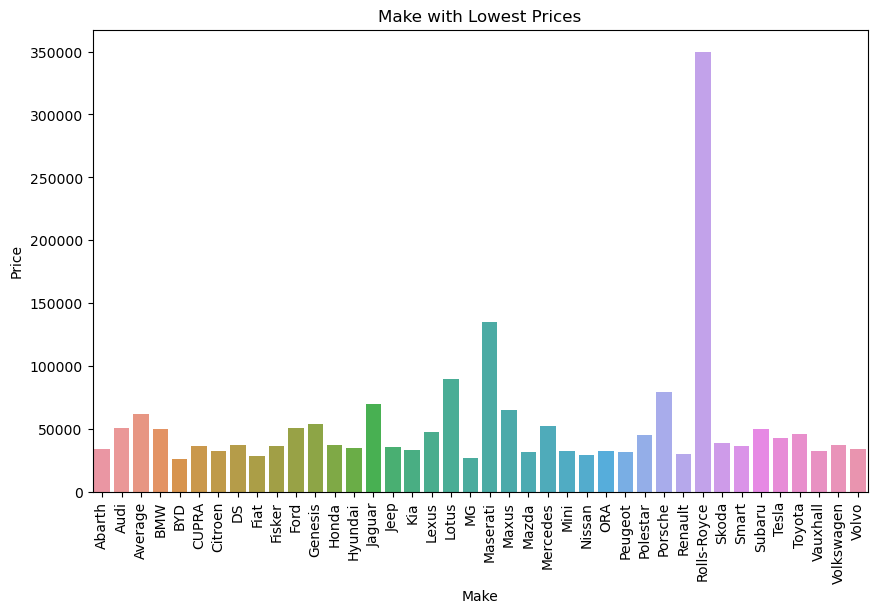

In [34]:
lowest_prices =no_dups.groupby('Make')['price'].min().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Make', y='price', data=lowest_prices)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Make with Lowest Prices')
plt.xticks(rotation=90)
plt.show()